In [0]:
#Visualize total number of categories 
#https://towardsdatascience.com/multi-class-text-classification-with-scikit-learn-12f1e60e0a9f

%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt


In [39]:
import pandas as pd
df = pd.read_csv('IssueDetailsSVF_20102019.csv')
df.head()

,IssueLabelID,Title,Description,Title_Description,Label,Assignee,CreatedAt,ClosedAt
0,153,Assertion failed: `it!=PAGNodeToActualParmMap....,While performing a flow-sensitive analysis of ...,Assertion failed: `it!=PAGNodeToActualParmMap....,bug,yuleisui,8/10/2019 9:43,8/10/2019 14:25
1,150,SVF crashes while writing results of Andersen ...,While writing Andersen analysis result to a fi...,SVF crashes while writing results of Andersen ...,bug,yuleisui,21/09/2019 2:00,5/10/2019 4:50
2,148,Question on usage of pointer analysis,Hi!\n\nThanks for sharing and maintaining such...,Question on usage of pointer analysis Hi!\n\nT...,question,yuleisui,5/09/2019 17:42,NaN
3,147,Unable to build getting error: llvm/IR/Attribu...,Getting this below error while trying build SV...,Unable to build getting error: llvm/IR/Attribu...,question,yuleisui,31/08/2019 1:15,NaN
4,146,Unknown command line arguement,Hi When I follow the simple C program example ...,Unknown command line arguement Hi When I follo...,invalid,yuleisui,30/08/2019 16:39,NaN


In [43]:
from io import StringIO
col = ['Label', 'Title']
df = df[col]
df = df[pd.notnull(df['Title'])]
df.columns = ['Label', 'Title']
df['IssueLabelID'] = df['Label'].factorize()[0]
category_id_df = df[['Label', 'IssueLabelID']].drop_duplicates().sort_values('Label')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['IssueLabelID', 'Label']].values)
df.head()

,Label,Title,IssueLabelID
0,bug,Assertion failed: `it!=PAGNodeToActualParmMap....,0
1,bug,SVF crashes while writing results of Andersen ...,0
2,question,Question on usage of pointer analysis,1
3,question,Unable to build getting error: llvm/IR/Attribu...,1
4,invalid,Unknown command line arguement,2


<Figure size 576x432 with 0 Axes>

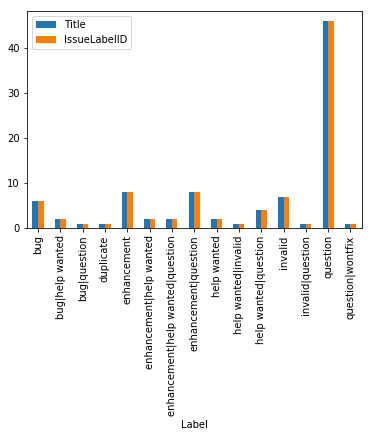

In [41]:
#Find Imbalanced Class
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Label').count().plot.bar(ylim=0)
plt.show()